# Comparison of stock KPP with LES for 4 canonical cases

In this notebook we compare KPP with LES data for the four canonical cases:

1. Free convection
2. Wind-driven shear mixing with neutral buoyancy forcing
3. Wind-driven shear mixing with destabilizing buoyancy forcing
4. Wind-driven shear mixing with stabilizing buoyancy forcing

In [3]:
using Pkg; Pkg.activate("..")

using ColumnModelOptimizationProject, PyPlot, JLD2, Printf

using ColumnModelOptimizationProject.KPPOptimization

import PyCall: pyimport

font_manager = pyimport("matplotlib.font_manager")
defaultcolors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

datadir = joinpath("..", "data", "idealized")

cases = ["free_convection", "shear_neutral", "shear_unstable", "shear_stable"]

dirs = Dict((c, joinpath(datadir, c)) for c in cases)

examples = Dict(
    "free_convection" => "wind_stress_N256_tau0_Q-75_dTdz0.01_k0.0001_dt0.25_days6_timeseries.jld2",
    "shear_neutral"   => "wind_stress_N256_tau0.1_Q0_dTdz0.001_k0.0001_dt0.25_days6_timeseries.jld2",
    "shear_unstable"  => "wind_stress_N256_tau0.1_Q-75_dTdz0.01_k0.0001_dt0.25_days6_timeseries.jld2",
    "shear_stable"    => "wind_stress_N256_tau0.04_Q10_dTdz0.01_k0.0001_dt0.25_days6_timeseries.jld2" )

examplepaths = Dict((c, joinpath(dirs[c], examples[c])) for c in cases)

┌ Info: Recompiling stale cache file /Users/gregorywagner/.julia/compiled/v1.0/ColumnModelOptimizationProject/HEzqG.ji for ColumnModelOptimizationProject [8137535c-6844-11e9-1caa-ffc4fab9c8ab]
└ @ Base loading.jl:1187


Dict{String,String} with 4 entries:
  "shear_unstable"  => "../data/idealized/shear_unstable/wind_stress_N256_tau0.…
  "shear_stable"    => "../data/idealized/shear_stable/wind_stress_N256_tau0.04…
  "free_convection" => "../data/idealized/free_convection/wind_stress_N256_tau0…
  "shear_neutral"   => "../data/idealized/shear_neutral/wind_stress_N256_tau0.1…

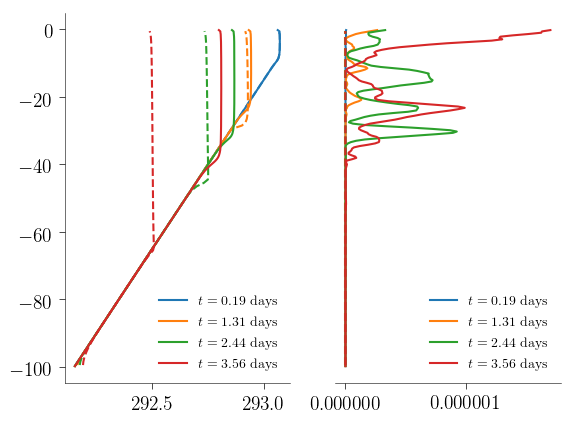

constants_dict = Dict(:α=>0.000207,:f=>0.0001,:g=>9.80665,:cP=>4181.3,:ρ₀=>1027.0)


PyObject <matplotlib.legend.Legend object at 0x13eb21a90>

In [5]:
using OceanTurb

model, obs, tout, idata = compare_with_data(examplepaths["free_convection"], initial_idata=2, idata=[8, 14, 20], N=100)

modelgrid = model[1][:U].grid
obsgrid = obs[1][:U].grid

Eobs = CellField(obsgrid)
Emodel = CellField(modelgrid)

fig, axs = subplots(ncols=2)

removespines("top", "right", ax=axs[1])
removespines("top", "right", "left", ax=axs[2])
axs[2].tick_params(left=false, labelleft=false)

for (i, t) in enumerate(tout)
    
    Umodel = model[i][:U]
    Vmodel = model[i][:V]
    set!(Emodel, Umodel.data.^2 + Vmodel.data.^2)
    
    Uobs = obs[i][:U]
    Vobs = obs[i][:V]
    set!(Eobs, Uobs.data.^2 + Vobs.data.^2)
    
    Tmodel = model[i][:T]
    Tobs = obs[i][:T]
    
    sca(axs[1])
    plot(Tobs, "-", color=defaultcolors[i], label=@sprintf("\$ t = %.2f \$ days", t/day))
    plot(Tmodel, "--", color=defaultcolors[i])
    
    sca(axs[2])
    plot(Eobs, "-", color=defaultcolors[i], label=@sprintf("\$ t = %.2f \$ days", t/day))
    plot(Emodel, "--", color=defaultcolors[i])
end

sca(axs[1])
legend(loc=4, fontsize=10)

sca(axs[2])
legend(loc=4, fontsize=10)